<a href="https://colab.research.google.com/github/jaewoong-87/machine-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

one kind of unsupervised learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_data(datasets, position, title):
  X, y = datasets
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:,0],X[:,1])

In [ ]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [ ]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

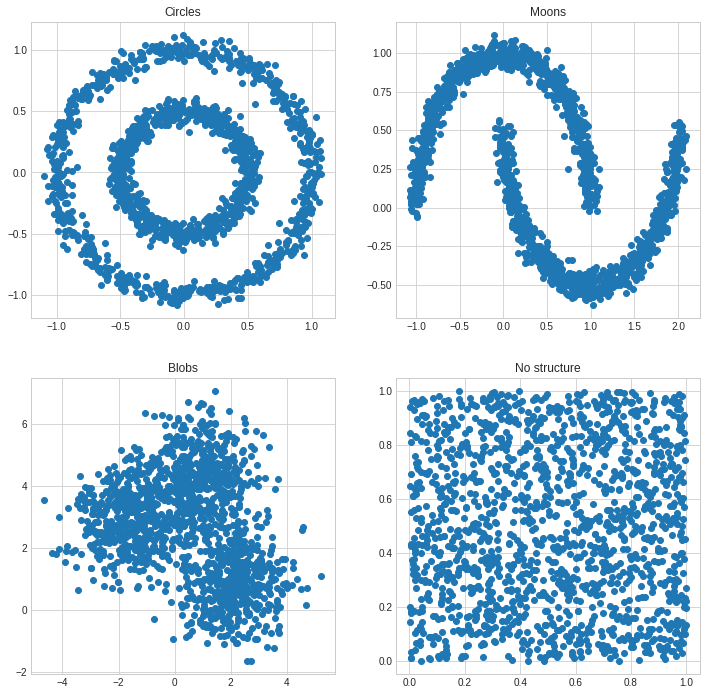

In [ ]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structure')

In [ ]:
def fit_predict_plot(model, datasets, position, title):
  X, y= datasets
  model.fit(X)
  if hasattr(model, 'labels_'):
    labels= model.labels_.astype(np.int)
  else:
    labels= model.predict(X)

  colors = np.array(['#30A9DE','#E53A40','#090707','#A593E0','#F6B352','#519D9E','#D81159','#8CD790','#353866'])
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:,0],X[:,1], color=colors[labels])

K-MEANS

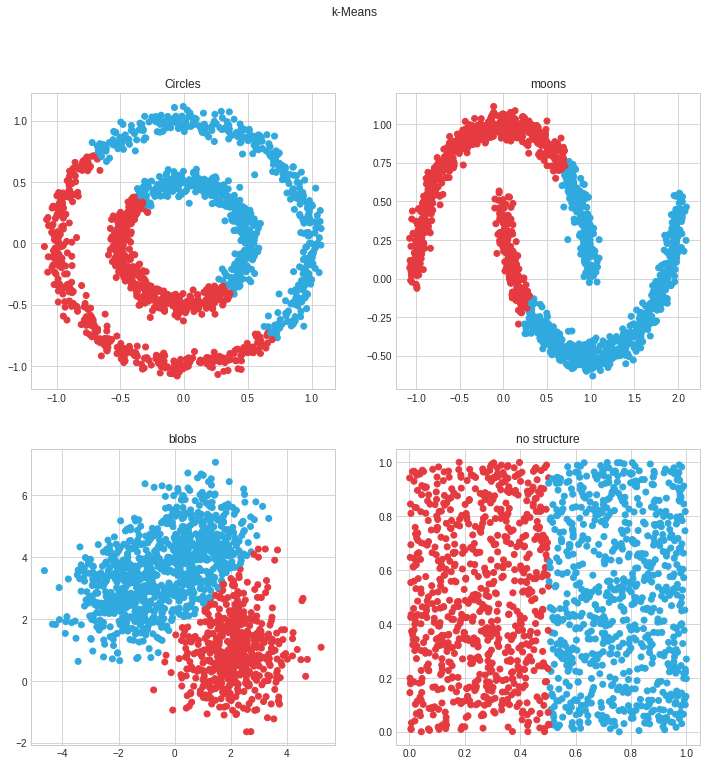

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),circles, 221,'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),moons, 222,'moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),blobs, 223,'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state),no_structures, 224,'no structure')

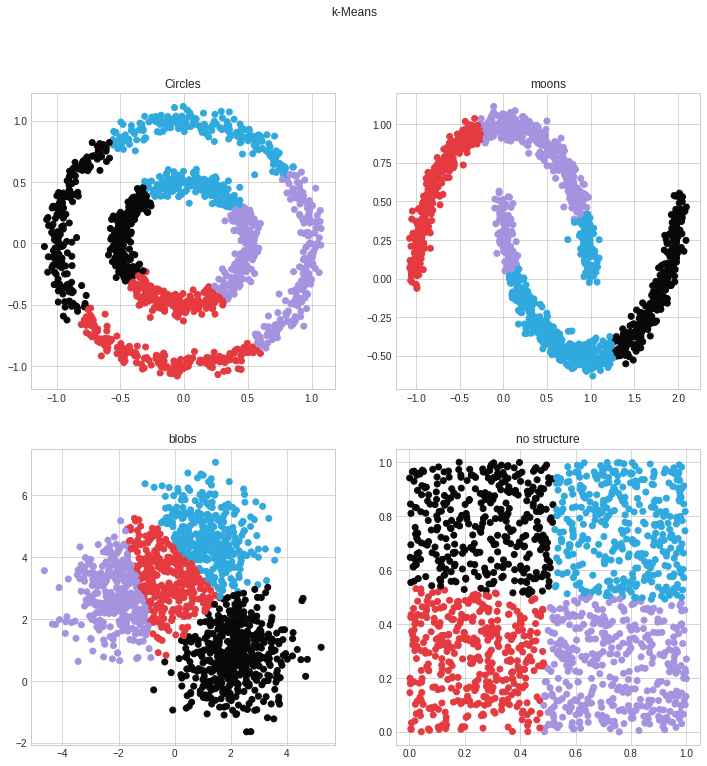

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),circles, 221,'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),moons, 222,'moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),blobs, 223,'blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state),no_structures, 224,'no structure')

iris cluster 

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [ ]:
idx = np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

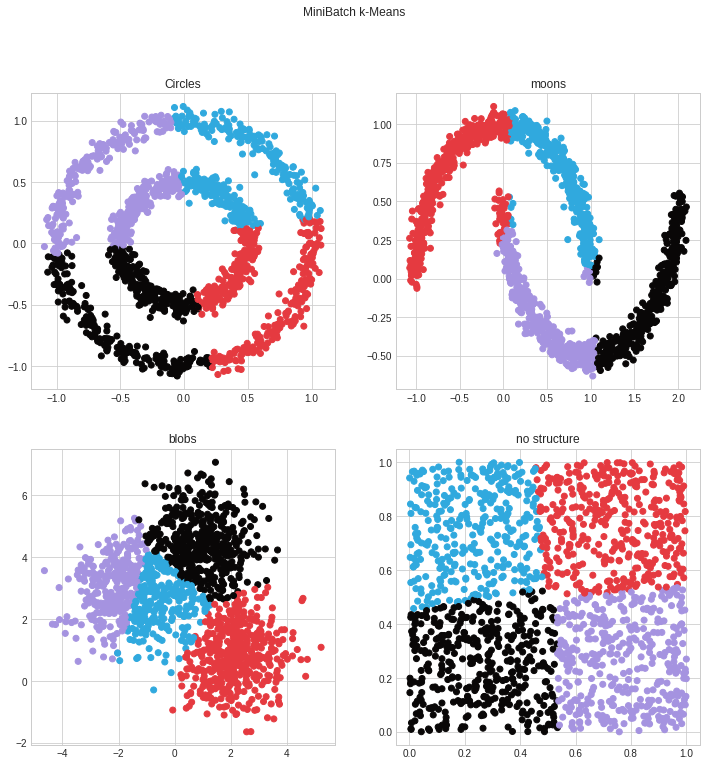

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),circles, 221,'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),moons, 222,'moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),blobs, 223,'blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state),no_structures, 224,'no structure')

affinity propagation (send sigal between pairs)

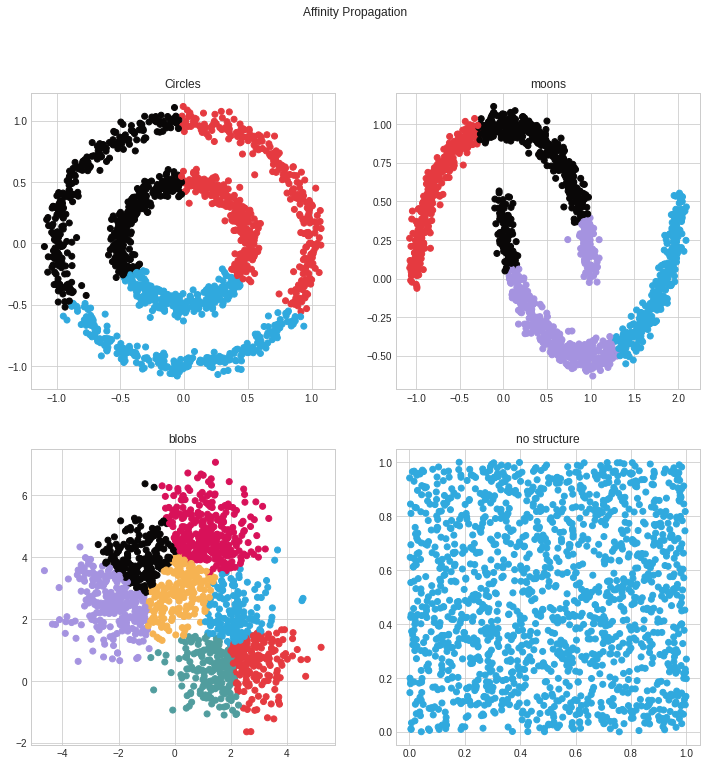

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200),circles, 221,'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200),moons, 222,'moons')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200),blobs, 223,'blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200),no_structures, 224,'no structure')

Mean Shift

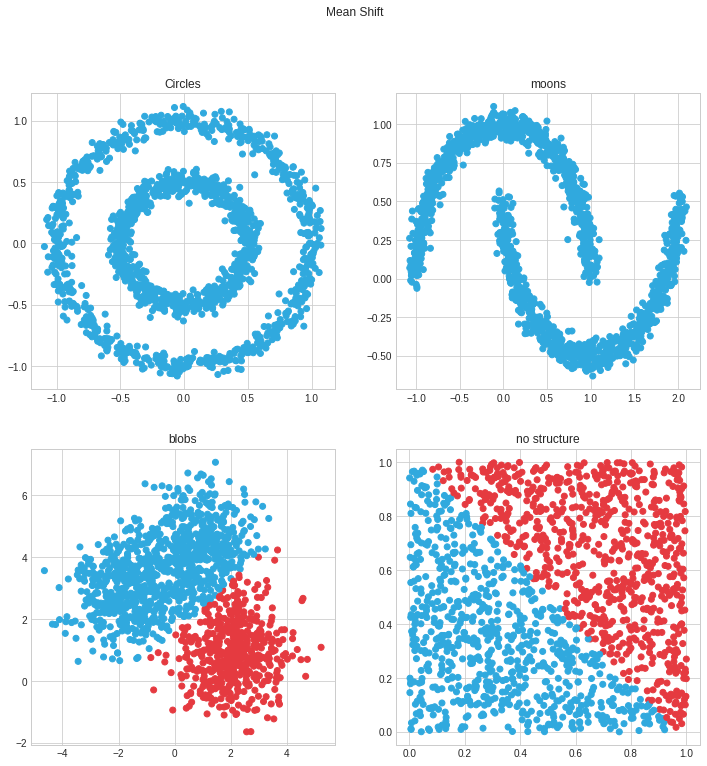

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(),circles, 221,'Circles')
fit_predict_plot(cluster.MeanShift(),moons, 222,'moons')
fit_predict_plot(cluster.MeanShift(),blobs, 223,'blobs')
fit_predict_plot(cluster.MeanShift(),no_structures, 224,'no structure')

spectral clustering

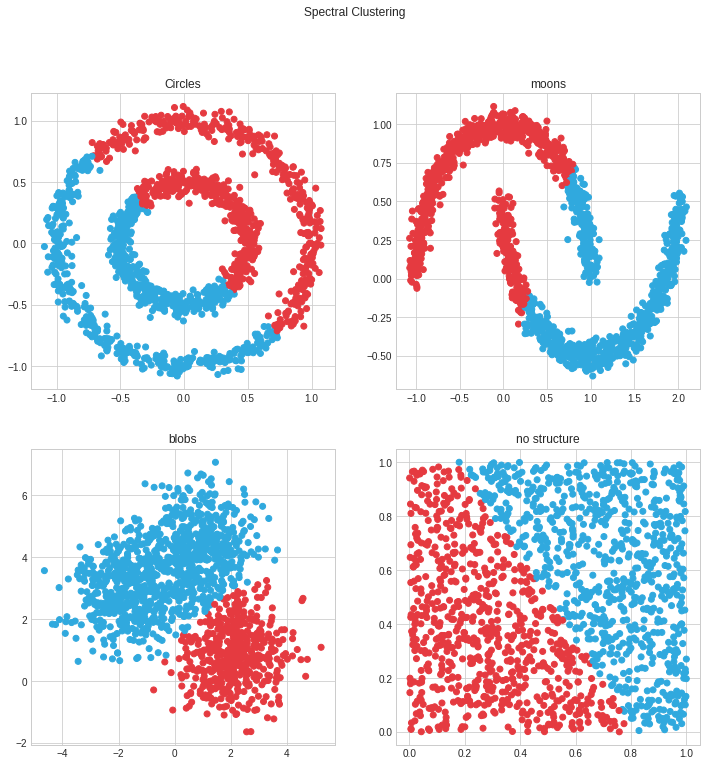

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),circles, 221,'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),moons, 222,'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),blobs, 223,'blobs') 
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state),no_structures, 224,'no structure')

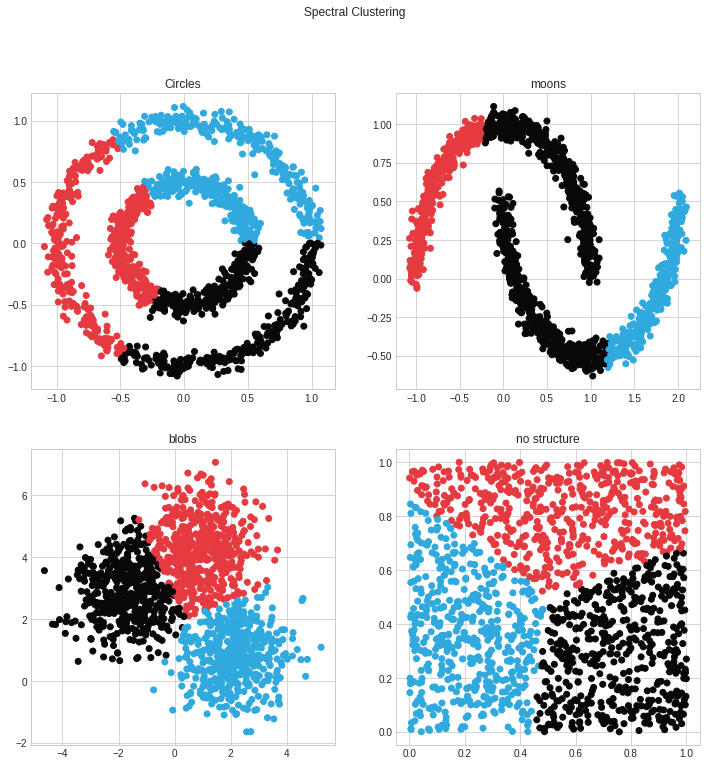

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),circles, 221,'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),moons, 222,'moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),blobs, 223,'blobs') 
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state),no_structures, 224,'no structure')

breast cancer clustering

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [ ]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

hierarchical clustering

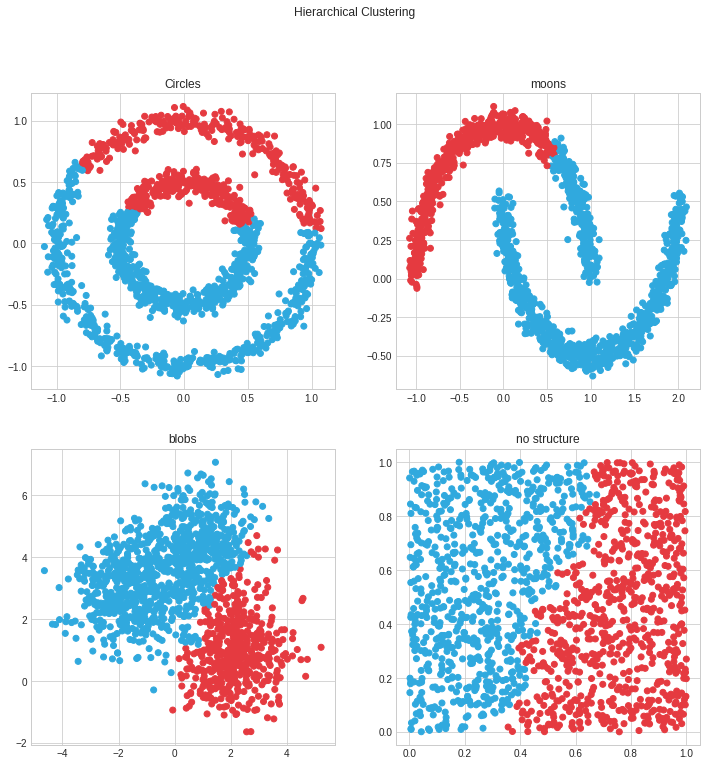

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),circles, 221,'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),moons, 222,'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),blobs, 223,'blobs') 
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'),no_structures, 224,'no structure')

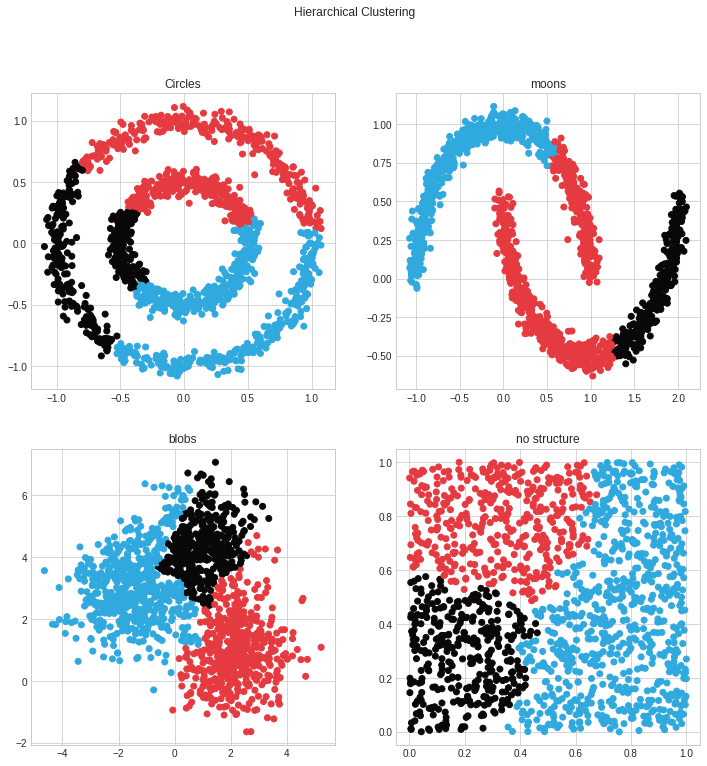

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),circles, 221,'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),moons, 222,'moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),blobs, 223,'blobs') 
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'),no_structures, 224,'no structure')

DBSCAN(Density Based Spatial Clustering of Application with Noise

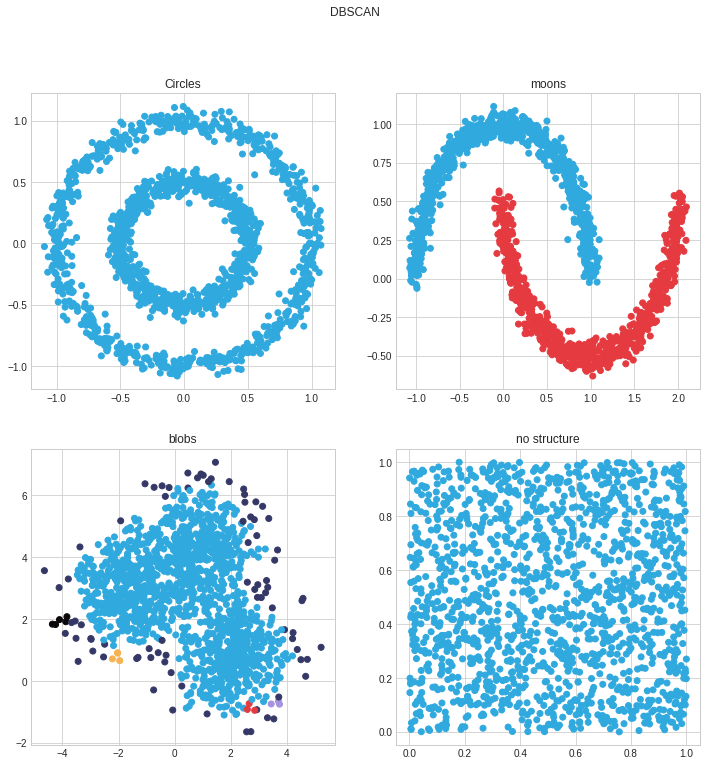

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3),circles, 221,'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3),moons, 222,'moons')
fit_predict_plot(cluster.DBSCAN(eps=.3),blobs, 223,'blobs') 
fit_predict_plot(cluster.DBSCAN(eps=.3),no_structures, 224,'no structure')

optcis

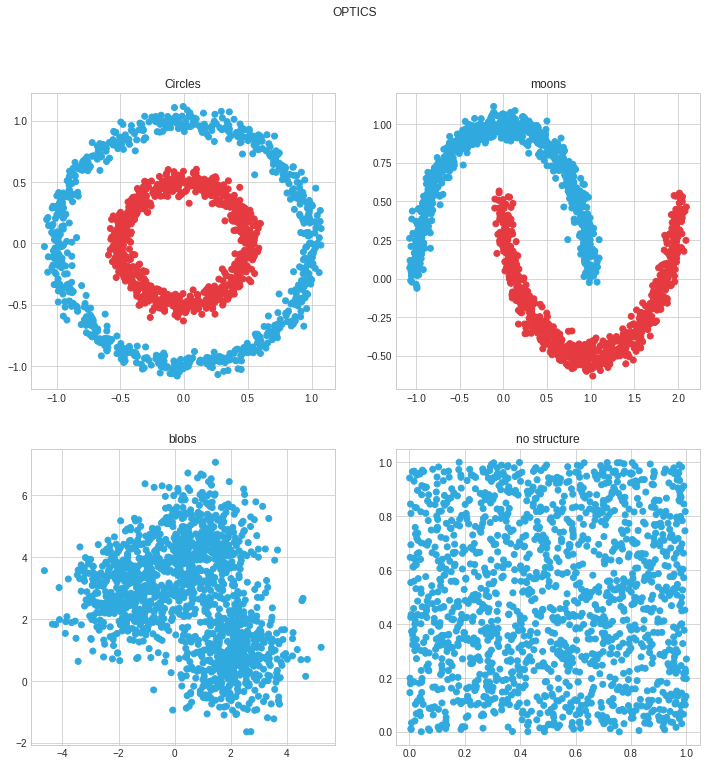

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),circles, 221,'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),moons, 222,'moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),blobs, 223,'blobs') 
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1),no_structures, 224,'no structure')

Birch

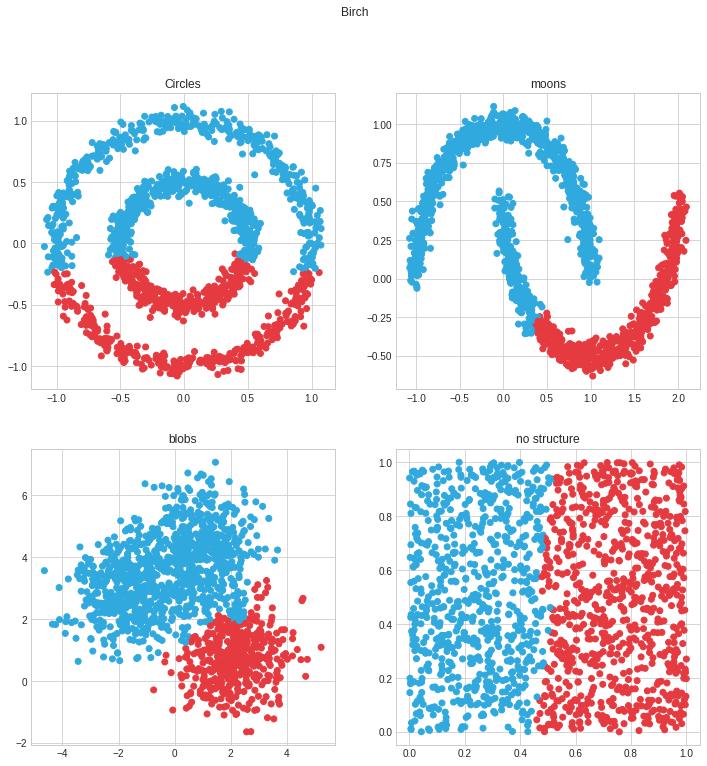

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3),circles, 221,'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3),moons, 222,'moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3),blobs, 223,'blobs') 
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3),no_structures, 224,'no structure')

handwriting clustering

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X = digits.data.reshape(-1, 8, 8)
y = digits.target

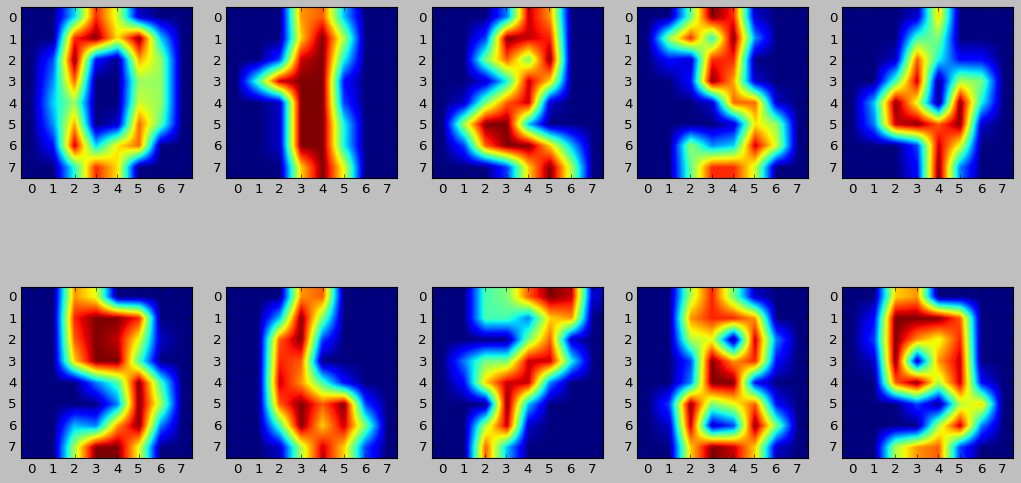

In [ ]:
plt.style.use([''])
plt.figure(figsize=(16, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X[i])

k-means

In [ ]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {}:{}".format(i+1, real_class))

Cluster 1:[1 1 7 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1 1
 1 4 1 1 1 1 4 8 9 9 4 9 9 9 9 7 9 9 9 9 9 9 9 8 8 8 8 1 1 1 1 1 1 1 1 1 1
 1 8 1 1 1 1 1 1 1 1 6 9 9 9 9 9 4]
Cluster 2:[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4
 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4]
Cluster 3:[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 8 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Cluster 4:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5

cluster:1


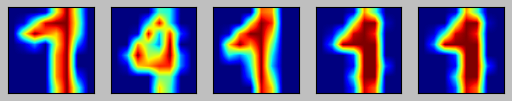

cluster:2


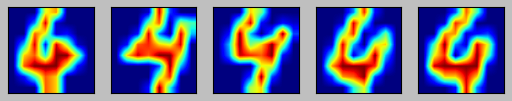

cluster:3


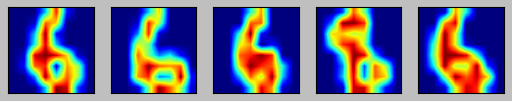

cluster:4


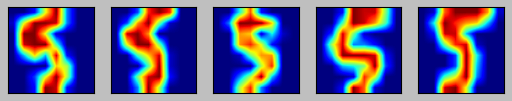

cluster:5


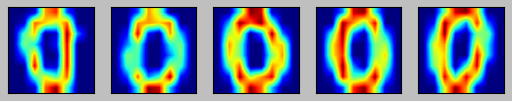

cluster:6


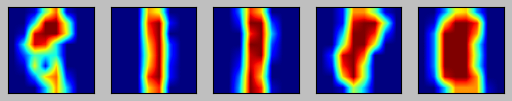

cluster:7


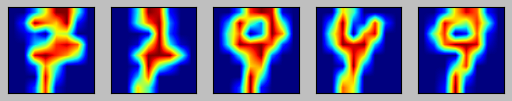

cluster:8


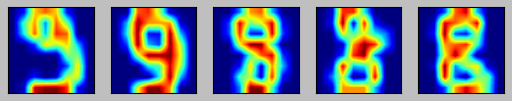

cluster:9


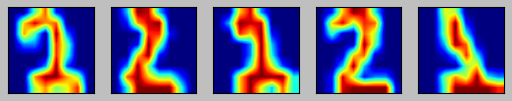

cluster:10


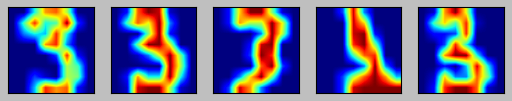

In [ ]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k =1

  print('cluster:{}'.format(i+1))
  for image in choice_image:
    plt.subplot(1,5,k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k +=1
  plt.show()

spectrial clustering

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

In [ ]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {}:{}".format(i+1, real_class))

Cluster 1:[1 2 8 8 8 8 2 2 8 2 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8 8
 1 1 8 1 8 8 8 1 1 1 1 1 1 1 8 1 1 8 8 8 6 2 8 8 8 8 8 9 8 8 8 8 1 8 8 8 8
 1 1 8 1 8 1 1 8 2 1 1 1 1 1 1 8 1 1 8 8 8 1 1 1 8 1 1 1 8 1 1 1 1 1 1 8 8
 1 1 8 1 8 1 1 8 1 1 1 1 1 1 8 1 1 8 8 8 8 1 8 1 1 1 1 1 1 1 1 8 1 8 8 8 8
 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 1 7 8 1 1 8 8 1 3 1 7 8 1 3 3 1
 8 1 1 1 1 8 1 1 8 1 1 3 8 1 8 8 1 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 8 8 8 8]
Cluster 2:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3
 5]
Cluster 3:[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

cluster:1


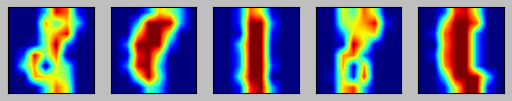

cluster:2


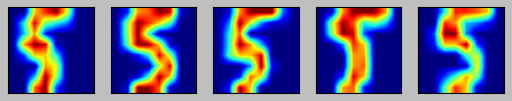

cluster:3


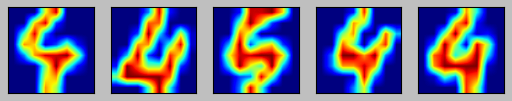

cluster:4


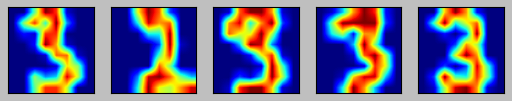

cluster:5


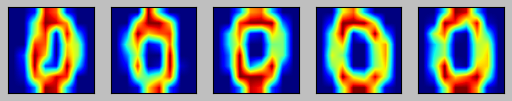

cluster:6


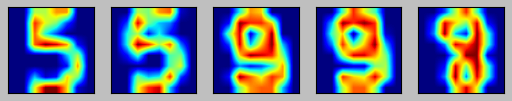

cluster:7


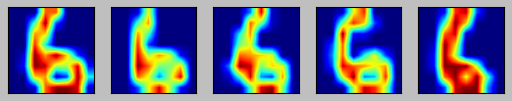

cluster:8


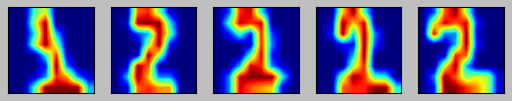

cluster:9


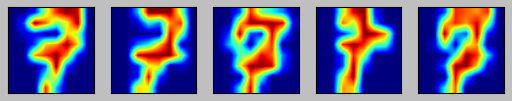

cluster:10


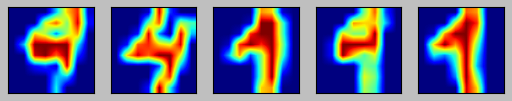

In [ ]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k =1

  print('cluster:{}'.format(i+1))
  for image in choice_image:
    plt.subplot(1,5,k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k +=1
  plt.show()

hierarchical clustering

In [ ]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {}:{}".format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

cluster:1


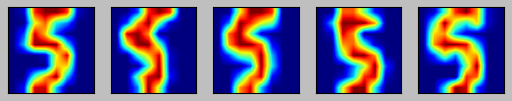

cluster:2


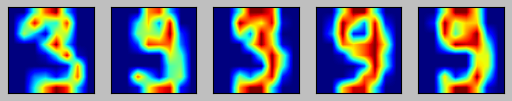

cluster:3


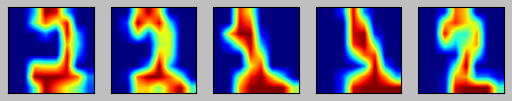

cluster:4


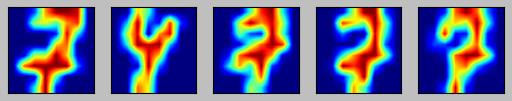

cluster:5


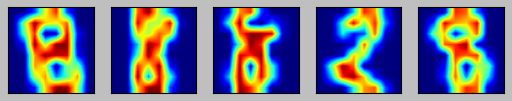

cluster:6


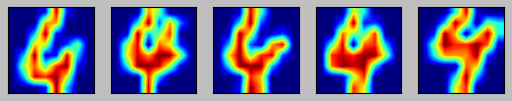

cluster:7


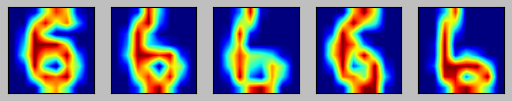

cluster:8


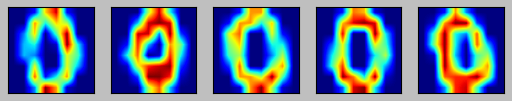

cluster:9


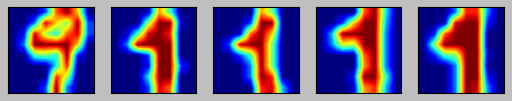

cluster:10


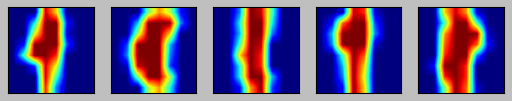

In [ ]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k =1

  print('cluster:{}'.format(i+1))
  for image in choice_image:
    plt.subplot(1,5,k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k +=1
  plt.show()

Birch

In [ ]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print("Cluster {}:{}".format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

cluster:1


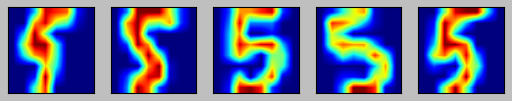

cluster:2


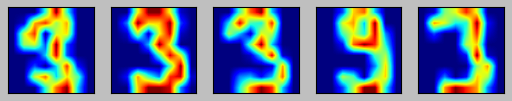

cluster:3


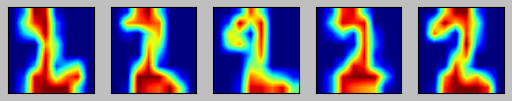

cluster:4


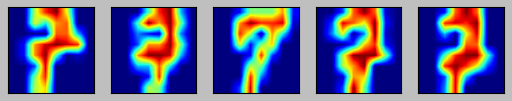

cluster:5


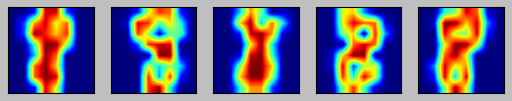

cluster:6


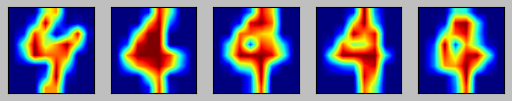

cluster:7


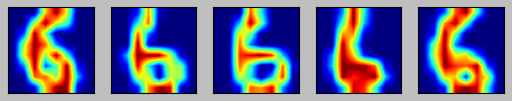

cluster:8


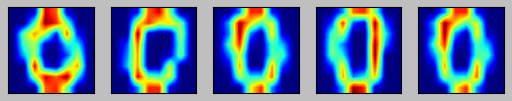

cluster:9


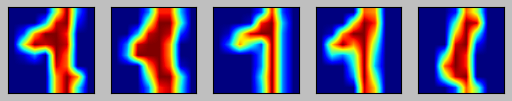

cluster:10


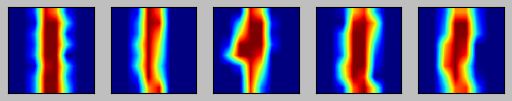

In [ ]:
for i in range(10):
  idx = np.where(predict == i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k =1

  print('cluster:{}'.format(i+1))
  for image in choice_image:
    plt.subplot(1,5,k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k +=1
  plt.show()